<h1 style="
    font-family: Garamond;
    font-size: 34px;
    color: #2774AE;
    font-weight: 700;
    text-shadow:
        -1px -1px 0 #000,
         1px -1px 0 #000,
        -1px  1px 0 #000,
         1px  1px 0 #000;
">
Forecasting Project - Checkpoint 1<em>
</h1>

<h2 style="
    font-family: Garamond;
    font-size: 22px;
    color: #FFD100;
    font-style: italic;
    text-shadow:
        -1px -1px 0 #000,
         1px -1px 0 #000,
        -1px  1px 0 #000,
         1px  1px 0 #000;
">
Econ 409 & Econ 442B
</h2>

<h3 style="
    font-family: Garamond;
    font-size: 20px;
    color: #2774AE;
    font-style: italic;
">
Jacob Williams, Praus Paek, Joshua Kenworthy, Agnibha Bhattacharya, and Ignacio Ramirez
</h3>

<h3 style="
    font-family: Garamond;
    font-size: 20px;
    color: #000000;
    font-style: italic;
">
University of California, Los Angeles
</h3>

<h3 style="
    font-family: Garamond;
    font-size: 20px;
    color: #000000;
    font-style: italic;
">
February 20, 2026
</h3>


---

<h2 style="
    font-family: Garamond;
    font-size: 22px;
    color: #FFD100;
    font-style: italic;
    text-shadow:
        -1px -1px 0 #000,
         1px -1px 0 #000,
        -1px  1px 0 #000,
         1px  1px 0 #000;
">
Chosen Asset class : Equities (SP 500 Sector - Energy Sector - S5ENRS)
</h2>

## Conceptual Framework

We use a Kalman filter to separate the "true" underlying trend of the S&P 500 Energy Sector Index (S5ENGS) 
from short-term noise. We model the observed S5ENGS price $y_t$ as a noisy version of a latent state $x_t$ 
that captures the sector's fundamental value:

$$y_t = x_t + v_t$$

The fundamental state evolves over time following its own past values and current earnings (EPS):

$$x_t = ax_{t-1} + \beta \cdot \text{EPS}_t + w_t$$

The filter then produces an estimate of this fundamental state at each point in time:

$$\hat{x}_t = (1-k) \cdot a\hat{x}_{t-1} + k \cdot y_t$$

where $k$ controls how much weight we put on new price data versus the previous estimate.

## Intuitive Explanation of Forecasting Strategy

The idea: energy sector prices go through long cycles of ups and downs, and investors are typically slow to recognize when a cycle has turned. Our strategy is looking to exploit that.

At each point in time we compute the filter error $\varepsilon_t = y_t - \hat{x}_t$ — simply the gap between the actual S5ENGS price and what earnings fundamentals say it should be. When this gap persistently starts moving in a new direction, it is a signal that the market is beginning to misprice the sector. We run a statistical test to confirm this shift is real and not just random noise, and only then take a directional position in S5ENGS. In general, we do not forecast all the time, we wait for clear empirical evidence that the market's beliefs are out of step with fundamentals before acting.

---

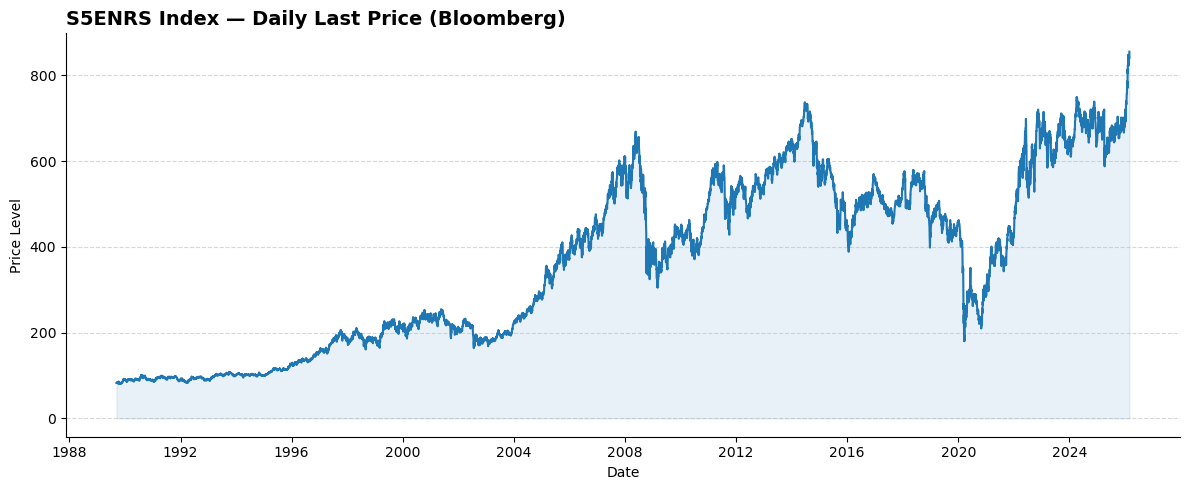

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Load data
df = pd.read_csv('S5ENGS.csv', names=['Date', 'Price'], header=0)
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna().sort_values('Date')

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df['Date'], df['Price'], color='#1f77b4', linewidth=1.5)
ax.fill_between(df['Date'], df['Price'], alpha=0.1, color='#1f77b4')

ax.set_title('S5ENRS Index — Daily Last Price (Bloomberg)', fontsize=14, fontweight='bold', loc='left')
ax.set_xlabel('Date')
ax.set_ylabel('Price Level')
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()